### Project - PlantGrowth R dataset analysis

##### 1. Dataset description

https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html   
https://wordpress.com/support/markdown-quick-reference/       


PlantGrowth R dataset [PlantGrowth.csv](./PlantGrowth.csv) used for the project was obtained from Vincent Arel-Bundock’s Rdataset page in csv format. Dataset includes <b>30 cases</b> of plants and two variables:       
1. dried weight of plants      
2. treatment condition:    
    -	Control group <b>ctrl</b>         
    -	Treatment type 1 applied to plants <b>trt1</b>      
    -	Treatment type 2 applied to plants <b>trt2</b>             

Dried weight of plants is measured for all groups, the control group without the treatment and the groups with two different treatment types. There is no more information provided on conditions the plants were treated in except different treatment types. Assuming the rest of conditions were set equal for each group, we will analyse data solely based on different treatment types. The purpose of the project is to compare plant growth according to a treatment type using t-test and ANOVA statistical tests. By using these tests, we will try to determine is there a significant difference between the groups. Additionally, we will compare ANOVA and t-test approach in this particular dataset analysis. 

In [15]:
# Import libraries necessary for the analysis
# Numerical computing
import numpy as np

# Create dataframe from csv data
import pandas as pd

# Statistical functions
import scipy.stats as stats 

# Plotting
import matplotlib.pyplot as plt     

# Data visualisation
import seaborn as sns

##### 2. Exploring data

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html  

Firstly, we transformed our dataset from csv format into a data frame using `pandas` library in order to get a neater description of data.

In [16]:
# Read data from csv using pandas
plants = pd.read_csv('PlantGrowth.csv')

In [17]:
# Check the length of the dataset
len(plants)

30

Since the dataset contains only 30 cases, we showed the entire dataset with its variables and values. Aside of weight of dried plants and treatment groups, another column that appears is the `rownames ` giving the ID number of plants. The column added before rownames presents indexing of data when transformed into a dataframe. 

In [18]:
# Display rows of the dataset
display(plants)

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


In order to show each group's plants weight separately, we split the plants data frame.


In [19]:
ctrl_group = plants[plants['group'] == 'ctrl']['weight']
trt1_group = plants[plants['group'] == 'trt1']['weight']
trt2_group = plants[plants['group'] == 'trt2']['weight']

#print(ctrl_group)
#print(trt1_group)
#print(trt2_group)

Then we pulled the descriptive statistics for each group using groupby() method.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html#pandas-dataframe-groupby  

In [20]:
group_descriptive = plants.groupby('group')['weight'].describe()
print(group_descriptive)

       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31


#### 3. What a t-test is, how it works, and what the assumptions are

For dependent or paired t-tests:   
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#ttest-rel  

For independent t-tests:    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html    

https://en.wikipedia.org/wiki/Student%27s_t-test   

<b>T-test</b> or a Student’s t-test is a statistical test used to test if there is a difference between two groups of values by comparing their means. 
It tests the null hypothesis (H<sub>0</sub>) which states that there is no difference between the means of the two groups. If the p-value, depending what threshold are we using, either α=0.01 or α=0.05, is lower than the threshold, we reject the null hypothesis and confirm the alternative hypothesis (H<sub>1</sub>) according to which the means of the two groups are different. 


Depending on the purpose of the test, we can distinguish between the paired or dependent t-test and an independent t-test. The paired t-test is used on the same subjects, for example to compare the results before and after the intervention on the same group of patients. The independent t-test, on the other hand, compares means of two unrelated groups, where the values of one group have no impact on the values in the other group in any sense. An example of this would be applying two types of treatments on patients where the values of one treatment does not relate to the values of the other treatment.  

https://en.wikipedia.org/wiki/Standard_error    

After running the t-test, we are looking at two values: t-statistic and p-value. T-statistic is calculated by subtracting the groups’ means from each other, regardless of the direction and dividing it with the standard error that includes standard deviation of samples. After calculating t-statistic, we check the p-value against the threshold of 0.01 or 0.05. If the p-value is less than the threshsold, we reject the null hypothesis, meaning that the difference didn’t happen accidentally, and the means of the groups are not equal.

##### Assumptions 

https://statistics.laerd.com/spss-tutorials/dependent-t-test-using-spss-statistics.php  

Depending on the type of t-test we are going to perform, we have to meet assumptions for test validity. The assumptions for the paired samples or the dependent t-test are:
1. The dependent variable must be continous or quantitative, in floating point values or intervals in order to perform a measurement. 
2. The subjects of categorical variable must be present in both groups, for example effects before and after the treatment on the same group of patients.
3. Outliers shouldn't be present when checking the differences between groups. The way to check this is by using boxplots. 
4. The differences between the groups should be normally distributed. This can be checked by using Q-Q plot or Shapiro-Wilk test.  

https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php  

The assumptions of the independent t-test are:
1. The dependent variable must be continous or quantitative, in floating point values or intervals in order to perform a measurement. 
2. The independent variable should include two unrelated, independent groups.
3. The values of two groups should not impact each other in any way and the groups' subjects are different.
4. Outliers in the values shouldn't be present since it can impact the result of the t-test.
5. The measured, dependent variable should be close to a normal distribution for both groups.
6. The variances of data in both groups should be similar, homogeneous in the spread.

#### 4. t-test to determine is there a significant difference between trt1 and trt2

In order to test if there is a difference between the two treatment groups, trt1 and trt2, first we check if the assumptions for the test are met. Since two treatment groups are independent of each other, we will perform an independent t-test.    
According to the first assumption, our dependent weight variable is continous and we can perform analysis on its values. The groups are not related to each other and are measured on different plants, which meets the second and the third assumption. In order to check the rest of the assumptions, we will do some boxplots and test the normality of samples. 


Text(0.5, 1.0, 'Treatment 1')

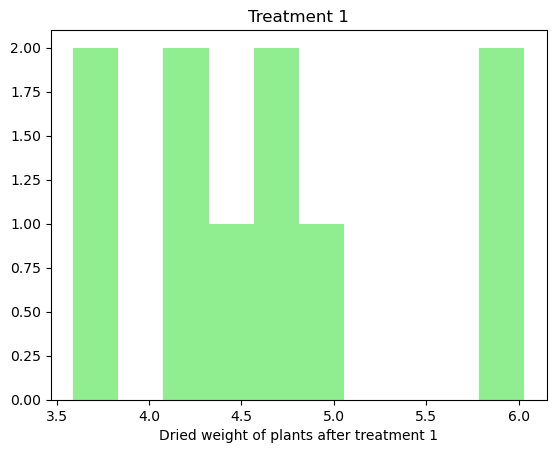

In [21]:
# Plot the treatment group 1
plt.hist(trt1_group, color='lightgreen')

# Add a label to the x-axis
plt.xlabel("Dried weight of plants after treatment 1")

# Add a title to the plot
plt.title("Treatment 1")

Create a Q-Q plot to check the shape of the values for dried weight of plants for treatment 1.

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([3.59, 3.83, 4.17, 4.32, 4.41, 4.69, 4.81, 4.89, 5.87, 6.03])),
 (0.8380130081223157, 4.661, 0.9686727154837835))

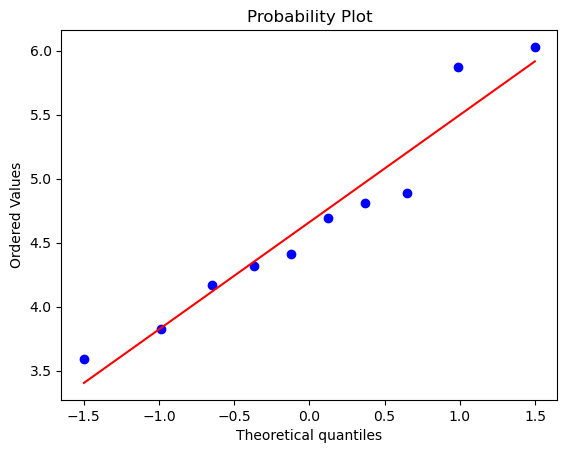

In [22]:
fig, ax = plt.subplots()

# Q-Q plot
stats.probplot(trt1_group, dist='norm', plot=ax)

We can say that the values of the dependent weight variable follow the shape of a normal distribution with a small deviation according to the Q-Q plot. 

In [23]:
# Shapiro-Wilk test to check if values are normally distributed
stats.shapiro(trt1_group)

ShapiroResult(statistic=0.9304106932921845, pvalue=0.45194395810927823)

P-value of Shapiro-Wilk test is not lower than 0.05 which is the threshold to reject H<sub>0</sub>. In this case, we are not rejecting the H<sub>0</sub>, and we can say that the values for dried plants after the treatment 1 follow the normal distribution. 

* histograms
* Shapiro-Wilk
* strip plot
* box plots
* t-test 

#### 5. ANOVA to determine is there a significant difference between ctrl, trt1 and trt2

#### 6. Explain why it is better to use ANOVA